# TF Regression examples without using tf.estimator

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
x_data = np.linspace(0.0,10.0,1000000)

In [20]:
noise = np.random.randn(len(x_data))

In [21]:
noise

array([-2.00858513, -0.23346779,  0.14944238, ..., -0.82822696,
        0.94672657,  2.02938241])

y = mx + b 

b = 5 

In [23]:
y_true = (0.5 * x_data) + 5 + noise

In [26]:
x_df = pd.DataFrame(data = x_data, columns=['X Data'])

In [28]:
y_df = pd.DataFrame(data= y_true, columns=['Y'])

In [30]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [29]:
y_df.head()

,Y
0,2.991415
1,4.766537
2,5.149452
3,5.481046
4,4.549843


In [31]:
my_data = pd.concat([x_df,y_df], axis = 1)

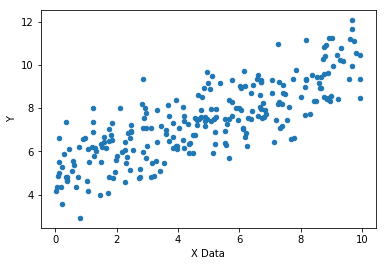

In [36]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y= 'Y')

In [37]:
# since 1 milion is very large to fee the network once we feed data batches
# number of batches depends on the dataset

In [38]:
batch_size = 8

In [40]:
np.random.randn(2)

array([-0.29079207, -0.95933483])

In [41]:
m = tf.Variable(0.20) # Creating Variables
b = tf.Variable(0.95)

In [42]:
xph = tf.placeholder(tf.float32, [batch_size]) # Creating Placeholders

In [43]:
yph = tf.placeholder(tf.float32, [batch_size])

In [45]:
y_model = m*xph + b #define the operation in your graph

In [46]:
error = tf.reduce_sum(tf.square(yph-y_model)) #Error/Loss function

In [48]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001) #Optimizer
train = optimizer.minimize(error)# set up the trainer

In [52]:
init = tf.global_variables_initializer() #intialize global variables

In [61]:
with tf.Session() as sess: 
    sess.run(init)
    
    num_batches = 10000 # we can play around with this 
    
    for i in range(num_batches): # challenging part
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]} # grab 8 random data points
        
        sess.run(train, feed_dict = feed) # train on 8000 data points
        
    model_m , model_b = sess.run([m,b])

In [63]:
model_m

0.5217737

In [64]:
model_b

5.0046706

In [65]:
y_hat = x_data*model_m + model_b

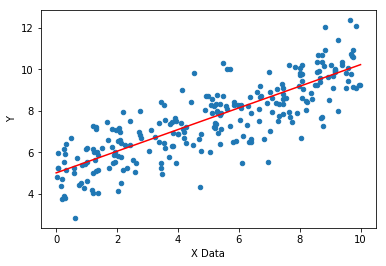

In [66]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat,'r')